In [43]:
# Niema Attarian - G00346901
# The following code was taken from https://www.ics.uci.edu/~mohamadt/keras_mnist.html 
# in order to understand the model in which written numerals are recognised.

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, Conv2D, MaxPooling2D, Flatten
from keras.utils import np_utils

from keras.regularizers import l2

# Load data.
# Defining the tuples and loading the data, (x is data, y is labels)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Here we are shaping the the array without changing the data
print("Original X shape", X_train.shape) 
print("Original Y shape", Y_train.shape)

# Reshape data.
X_train = X_train.reshape(60000, 784)
X_test  = X_test.reshape(10000, 784)

# Casting to a float array
X_train = X_train.astype('float32') 
X_test  = X_test.astype('float32')

# Normalising to a common scale without losing information
X_train /= 255 # Original data is uint8 (0-255). Scale it to range [0,1].
X_test  /= 255

print("Training X matrix shape", X_train.shape) 
print("Testing X matrix shape", X_test.shape)

Original X shape (60000, 28, 28)
Original Y shape (60000,)
Training X matrix shape (60000, 784)
Testing X matrix shape (10000, 784)


In [44]:
# Represent the targets as one-hot vectors: e.g. 2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0].
nb_classes = 10
Y_train = np_utils.to_categorical(Y_train, nb_classes) # to_categorical converts a class vector into a binary class matrix 
Y_test  = np_utils.to_categorical(Y_test, nb_classes) # and returns a binary matrix representation of the class. ( [0, 0, 1, ... 0] )

print("Training Y matrix shape", Y_train.shape)
print("Testing Y matrix shape", Y_test.shape)

Training Y matrix shape (60000, 10)
Testing Y matrix shape (10000, 10)


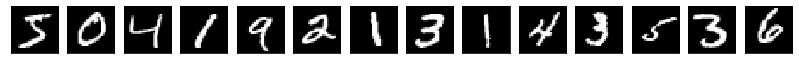

In [45]:
# Plot examples of the data.
plt.figure(1, figsize=(14,14))
for i in range(14):
    plt.subplot(1,14,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.xticks([]) # ticks along the x axis
    plt.yticks([]) # ticks along the y axis 

In [46]:
# Simple fully-connected neural network with 2 hidden layers.
model = Sequential()
# Layers
model.add(Dense(256, activation='relu', input_shape=(784,), W_regularizer=l2(0.001))) # Use input_shape=(28,28) for unflattened data.
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2)) # Including dropout layer helps avoid overfitting.
model.add(Dense(10, activation='softmax')) # Use softmax layer for multi-class problems.

/home/niema/PycharmProjects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", input_shape=(784,), kernel_regularizer=<keras.reg...)`
  after removing the cwd from sys.path.


In [47]:
# Compiles and builds each layer.
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Loss: is the objective function being optimized, and the categorical_crossentropy is the appropriate loss function for the softmax output
# Accuracy: The accuracy is just a metric that we keep track of during training. Keras also allows you to define your own metrics.
# Optimizer: he optimizer is the algorithm used to update the weights.
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [49]:
history = model.fit(X_train, Y_train, batch_size=128, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/home/niema/PycharmProjects/venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 193us/step - loss: 0.4638 - accuracy: 0.9218 - val_loss: 0.2302 - val_accuracy: 0.9649
Epoch 2/10
60000/60000 [==============================] - 14s 233us/step - loss: 0.2103 - accuracy: 0.9639 - val_loss: 0.1967 - val_accuracy: 0.9643
Epoch 3/10
60000/60000 [==============================] - 14s 232us/step - loss: 0.1646 - accuracy: 0.9695 - val_loss: 0.1490 - val_accuracy: 0.9731
Epoch 4/10
60000/60000 [==============================] - 13s 219us/step - loss: 0.1416 - accuracy: 0.9740 - val_loss: 0.2774 - val_accuracy: 0.9276
Epoch 5/10
60000/60000 [==============================] - 13s 210us/step - loss: 0.1306 - accuracy: 0.9754 - val_loss: 0.1381 - val_accuracy: 0.9730
Epoch 6/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.1200 - accuracy: 0.9775 - val_loss: 0.1544 - val_accuracy: 0.9654
Epoch 7/10
60000/60000 [==============================] 

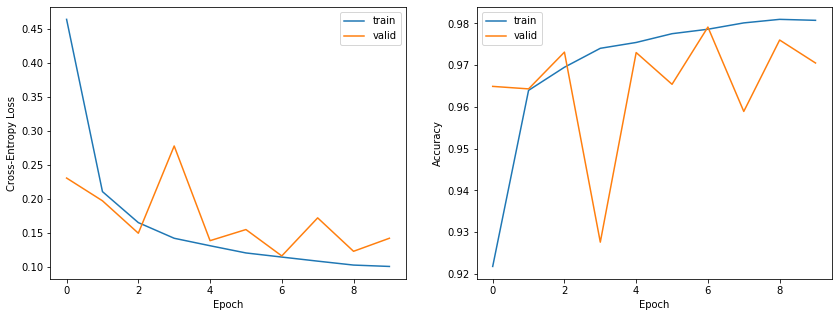

In [50]:
# Plot loss trajectory throughout training.
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [51]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test cross-entropy loss: %0.5f' % score[0])
print('Test accuracy: %0.2f' % score[1])

Test cross-entropy loss: 0.14162
Test accuracy: 0.97


In [52]:
print(score)

[0.14161815952062606, 0.9704999923706055]


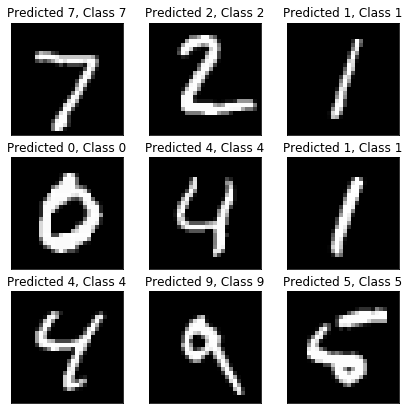

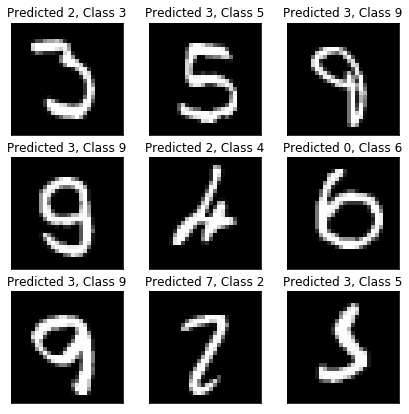

In [53]:
predicted_classes = model.predict_classes(X_test)
correct_indices   = np.nonzero(predicted_classes == Y_test.argmax(axis=-1))[0] # np.nonzero returns tuple of arrays
incorrect_indices = np.nonzero(predicted_classes != Y_test.argmax(axis=-1))[0]

plt.figure(1, figsize=(7,7))
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], Y_test[correct].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])

plt.figure(2, figsize=(7,7))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], Y_test[incorrect].argmax(axis=-1)))
    plt.xticks([])
    plt.yticks([])